In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from itertools import combinations
from statsmodels.stats.multitest import multipletests


In [19]:
file_path = r"C:\Users\34679\Desktop\TFM\DatosVocales\comparacion_vocales_sujetos.xlsx"

df = pd.read_excel(file_path, sheet_name='Sheet1')


df.head(12)


,Participante,Banda de Frecuencia,Vocal,F1 Score,Accuracy
0,1,Alpha,A,0.87,1.00
1,1,Alpha,E,0.74,0.66
2,1,Alpha,I,0.78,0.63
3,1,Alpha,O,0.80,0.83
4,1,Alpha,U,0.83,0.90
5,1,Beta,A,0.87,1.00
6,1,Beta,E,0.85,0.73
7,1,Beta,I,0.78,0.81
8,1,Beta,O,0.88,0.91
9,1,Beta,U,0.90,0.81


In [20]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests


df_grouped_F1 = df.groupby(['Participante', 'Banda de Frecuencia'])['F1 Score'].mean().reset_index()

print(df_grouped_F1.head())

bands = ['Alpha', 'Beta', 'Gamma', 'High Gamma', 'All Bands']

wilcoxon_results = {}

for i in range(len(bands)):
    for j in range(i + 1, len(bands)):
        band1 = bands[i]
        band2 = bands[j]
        
        # Filtrar los datos por banda de frecuencia
        data1 = df_grouped_F1[df_grouped_F1['Banda de Frecuencia'] == band1]['F1 Score']
        data2 = df_grouped_F1[df_grouped_F1['Banda de Frecuencia'] == band2]['F1 Score']
        
        
        min_length = min(len(data1), len(data2))
        data1 = data1.iloc[:min_length]
        data2 = data2.iloc[:min_length]
        
        
        stat, p_value = stats.wilcoxon(data1, data2)
        wilcoxon_results[f"{band1} vs {band2}"] = (stat, p_value)

results_df = pd.DataFrame(wilcoxon_results, index=['Estadístico', 'Valor p']).T

p_values = results_df['Valor p'].astype(float)

_, p_adjusted, _, _ = multipletests(p_values, method='bonferroni')

results_df['Valor p Ajustado'] = p_adjusted

print(results_df)


   Participante Banda de Frecuencia  F1 Score
0             1           All Bands     0.676
1             1               Alpha     0.804
2             1                Beta     0.856
3             1               Gamma     0.630
4             1          High Gamma     0.568
                         Estadístico   Valor p  Valor p Ajustado
Alpha vs Beta                   33.0  0.637870          1.000000
Alpha vs Gamma                  14.0  0.026611          0.266113
Alpha vs High Gamma              1.0  0.000488          0.004883
Alpha vs All Bands              24.0  0.146484          1.000000
Beta vs Gamma                   12.0  0.017090          0.170898
Beta vs High Gamma               3.0  0.001221          0.012207
Beta vs All Bands               27.0  0.216309          1.000000
Gamma vs High Gamma              3.0  0.001221          0.012207
Gamma vs All Bands              10.5  0.010498          0.104980
High Gamma vs All Bands          0.0  0.000244          0.002441


c:\Users\34679\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


In [28]:
plt.figure(figsize=(10, 6))


sns.boxplot(x='Banda de Frecuencia', y='F1 Score', data=df_grouped, palette='Set2', fliersize=0, linewidth=1.2)


sns.stripplot(x='Banda de Frecuencia', y='F1 Score', data=df_grouped, jitter=True, color='black', size=5, dodge=False, alpha=0.7)


plt.title(None)
plt.xlabel('Frequency Band')
plt.ylabel('F1 Score in Vowel Discrimination [%]')


plt.savefig('boxplot_f1_score.png', format='png', bbox_inches='tight')

plt.show()



ValueError: Could not interpret value `F1 Score` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [27]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests


df_grouped_A = df.groupby(['Participante', 'Banda de Frecuencia'])['Accuracy'].mean().reset_index()

print(df_grouped_A.head())

bands = ['Alpha', 'Beta', 'Gamma', 'High Gamma']

wilcoxon_results = {}

for i in range(len(bands)):
    for j in range(i + 1, len(bands)):
        band1 = bands[i]
        band2 = bands[j]
        
        # Filtrar los datos por banda de frecuencia
        data1 = df_grouped_A[df_grouped_A['Banda de Frecuencia'] == band1]['Accuracy']
        data2 = df_grouped_A[df_grouped_A['Banda de Frecuencia'] == band2]['Accuracy']
        
        
        min_length = min(len(data1), len(data2))
        data1 = data1.iloc[:min_length]
        data2 = data2.iloc[:min_length]
        
        
        stat, p_value = stats.wilcoxon(data1, data2)
        wilcoxon_results[f"{band1} vs {band2}"] = (stat, p_value)

results_df = pd.DataFrame(wilcoxon_results, index=['Estadístico', 'Valor p']).T

p_values = results_df['Valor p'].astype(float)

_, p_adjusted, _, _ = multipletests(p_values, method='bonferroni')

results_df['Valor p Ajustado'] = p_adjusted

print(results_df)


   Participante Banda de Frecuencia  Accuracy
0             1           All Bands     0.664
1             1               Alpha     0.804
2             1                Beta     0.852
3             1               Gamma     0.612
4             1          High Gamma     0.560
                     Estadístico   Valor p  Valor p Ajustado
Alpha vs Beta               39.0  0.684814          1.000000
Alpha vs Gamma              14.0  0.026611          0.159668
Alpha vs High Gamma          1.0  0.000488          0.002930
Beta vs Gamma               14.0  0.026611          0.159668
Beta vs High Gamma           2.0  0.000732          0.004395
Gamma vs High Gamma          3.0  0.001221          0.007324


C:\Users\34679\AppData\Local\Temp\ipykernel_21288\478847674.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Banda de Frecuencia', y='Accuracy', data=df_filtered, palette='Set2', fliersize=0, linewidth=1.2)


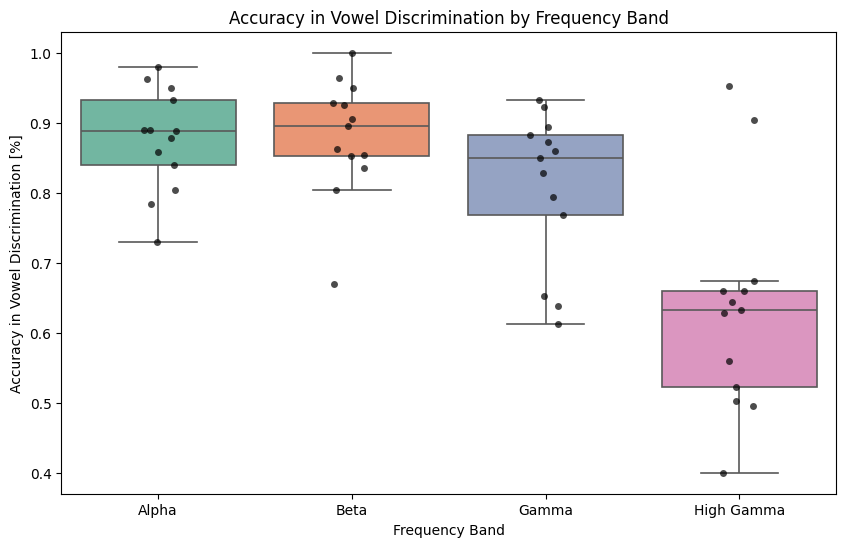

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df_filtered = df_grouped_A[df_grouped_A['Banda de Frecuencia'] != 'All Bands']


plt.figure(figsize=(10, 6))


sns.boxplot(x='Banda de Frecuencia', y='Accuracy', data=df_filtered, palette='Set2', fliersize=0, linewidth=1.2)


sns.stripplot(x='Banda de Frecuencia', y='Accuracy', data=df_filtered, jitter=True, color='black', size=5, dodge=False, alpha=0.7)

plt.title('Accuracy in Vowel Discrimination by Frequency Band')
plt.xlabel('Frequency Band')
plt.ylabel('Accuracy in Vowel Discrimination [%]')


plt.savefig('boxplot_Accuracy_Vowels.png', format='png', bbox_inches='tight')

plt.show()


C:\Users\34679\AppData\Local\Temp\ipykernel_21288\1289156452.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Banda de Frecuencia', y='F1 Score', data=df_filtered_F1, palette='Set2', fliersize=0, linewidth=1.2)


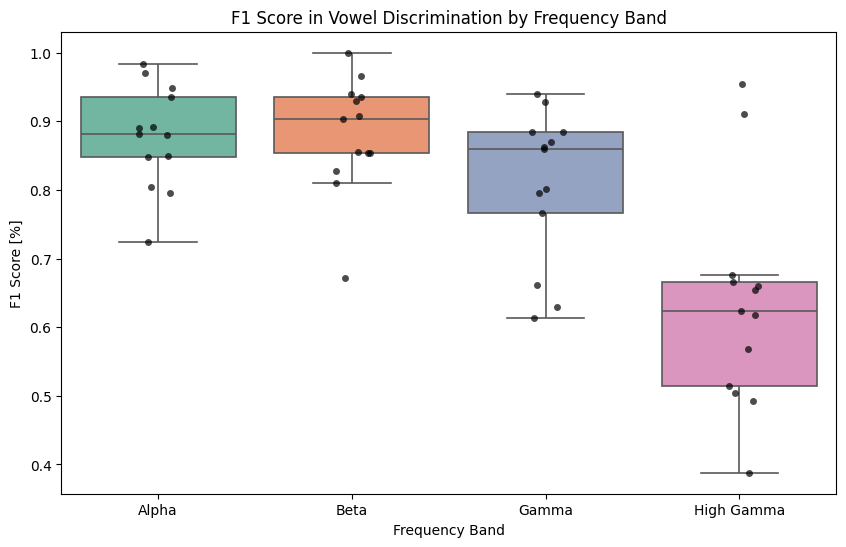

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_filtered_F1 = df_grouped_F1[df_grouped_F1['Banda de Frecuencia'] != 'All Bands']


plt.figure(figsize=(10, 6))

sns.boxplot(x='Banda de Frecuencia', y='F1 Score', data=df_filtered_F1, palette='Set2', fliersize=0, linewidth=1.2)

sns.stripplot(x='Banda de Frecuencia', y='F1 Score', data=df_filtered_F1, jitter=True, color='black', size=5, dodge=False, alpha=0.7)


plt.title('F1 Score in Vowel Discrimination by Frequency Band')
plt.xlabel('Frequency Band')
plt.ylabel('F1 Score [%]')

plt.savefig('boxplot_F1_Score_Vowels.png', format='png', bbox_inches='tight')


plt.show()



Z-Score for All Bands: 23.70
P-Value for All Bands: 0.0000


C:\Users\34679\AppData\Local\Temp\ipykernel_21288\77496188.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')


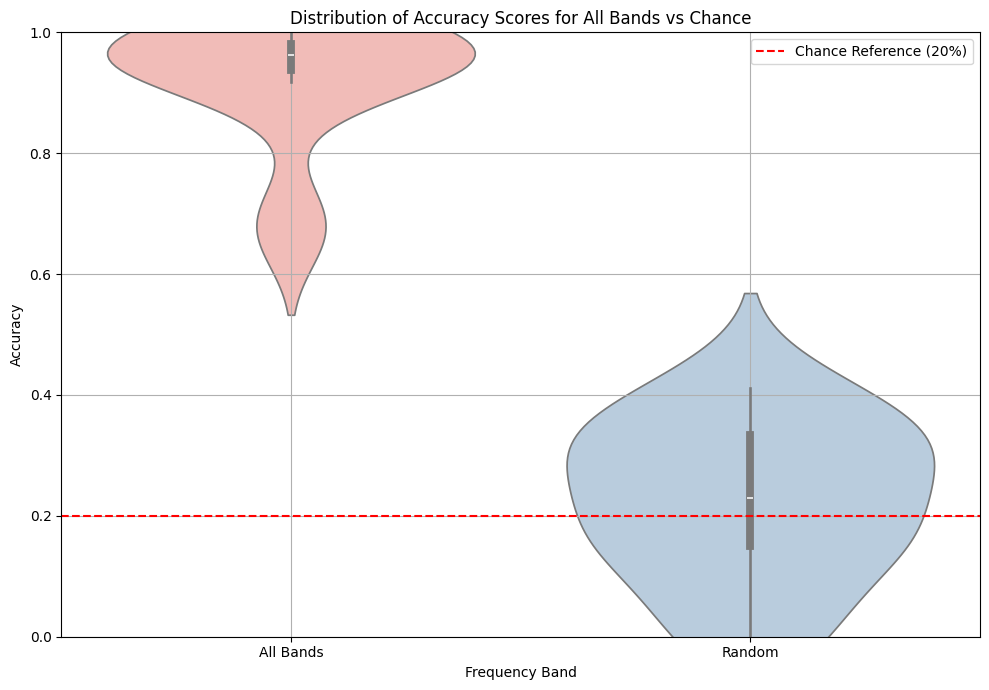

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

reference_value = 0.20

df_grouped = df.groupby(['Participante', 'Banda de Frecuencia'])['Accuracy'].mean().reset_index()

filtered_df = df_grouped[df_grouped['Banda de Frecuencia'] == 'All Bands']

random_data = pd.DataFrame({
    'Participante': filtered_df['Participante'],  
    'Banda de Frecuencia': ['Random'] * len(filtered_df),
    'Accuracy': np.clip(np.random.normal(loc=reference_value, scale=0.1, size=len(filtered_df)), 0, 1)
})

combined_df = pd.concat([filtered_df, random_data])

mean_accuracy = filtered_df['Accuracy'].mean()
std_accuracy = filtered_df['Accuracy'].std()
z_score = (mean_accuracy - reference_value) / (std_accuracy / np.sqrt(len(filtered_df)))
p_value = stats.norm.sf(np.abs(z_score)) * 2  

print(f"Z-Score for All Bands: {z_score:.2f}")
print(f"P-Value for All Bands: {p_value:.4f}")


plt.figure(figsize=(10, 7))
sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')


plt.axhline(reference_value, color='red', linestyle='--', label=f'Chance Reference (20%)')


plt.ylim(0, 1)  

plt.title('Distribution of Accuracy Scores for All Bands vs Chance')
plt.xlabel('Frequency Band')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('Model_vs_Chance_Comparison_All_Bands_Accuracy.png', format='png', bbox_inches='tight')
plt.show()


Z-Score for All Bands: 29.11
P-Value for All Bands: 0.0000


C:\Users\34679\AppData\Local\Temp\ipykernel_13556\2874487158.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')


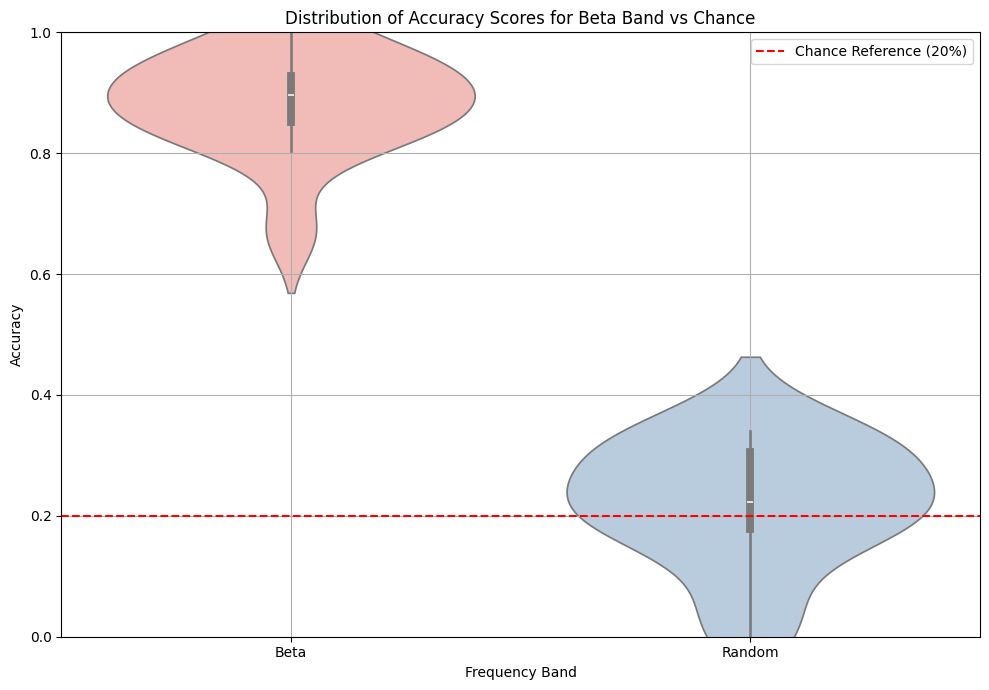

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


reference_value = 0.20

df_grouped = df.groupby(['Participante', 'Banda de Frecuencia'])['Accuracy'].mean().reset_index()

filtered_df = df_grouped[df_grouped['Banda de Frecuencia'] == 'Beta']

random_data = pd.DataFrame({
    'Participante': filtered_df['Participante'],  # Mantener la misma cantidad de participantes
    'Banda de Frecuencia': ['Random'] * len(filtered_df),
    'Accuracy': np.clip(np.random.normal(loc=reference_value, scale=0.1, size=len(filtered_df)), 0, 1)
})

combined_df = pd.concat([filtered_df, random_data])

mean_accuracy = filtered_df['Accuracy'].mean()
std_accuracy = filtered_df['Accuracy'].std()
z_score = (mean_accuracy - reference_value) / (std_accuracy / np.sqrt(len(filtered_df)))
p_value = stats.norm.sf(np.abs(z_score)) * 2  # Valor p para el Z-Score

print(f"Z-Score for All Bands: {z_score:.2f}")
print(f"P-Value for All Bands: {p_value:.4f}")


plt.figure(figsize=(10, 7))
sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')


plt.axhline(reference_value, color='red', linestyle='--', label=f'Chance Reference (20%)')


plt.ylim(0, 1)  

plt.title('Distribution of Accuracy Scores for Beta Band vs Chance')
plt.xlabel('Frequency Band')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('Model_vs_Chance_Comparison_Beta_Band_Accuracy.png', format='png', bbox_inches='tight')
plt.show()


Mean Accuracy (%) Excluding Participant 7: 92.06


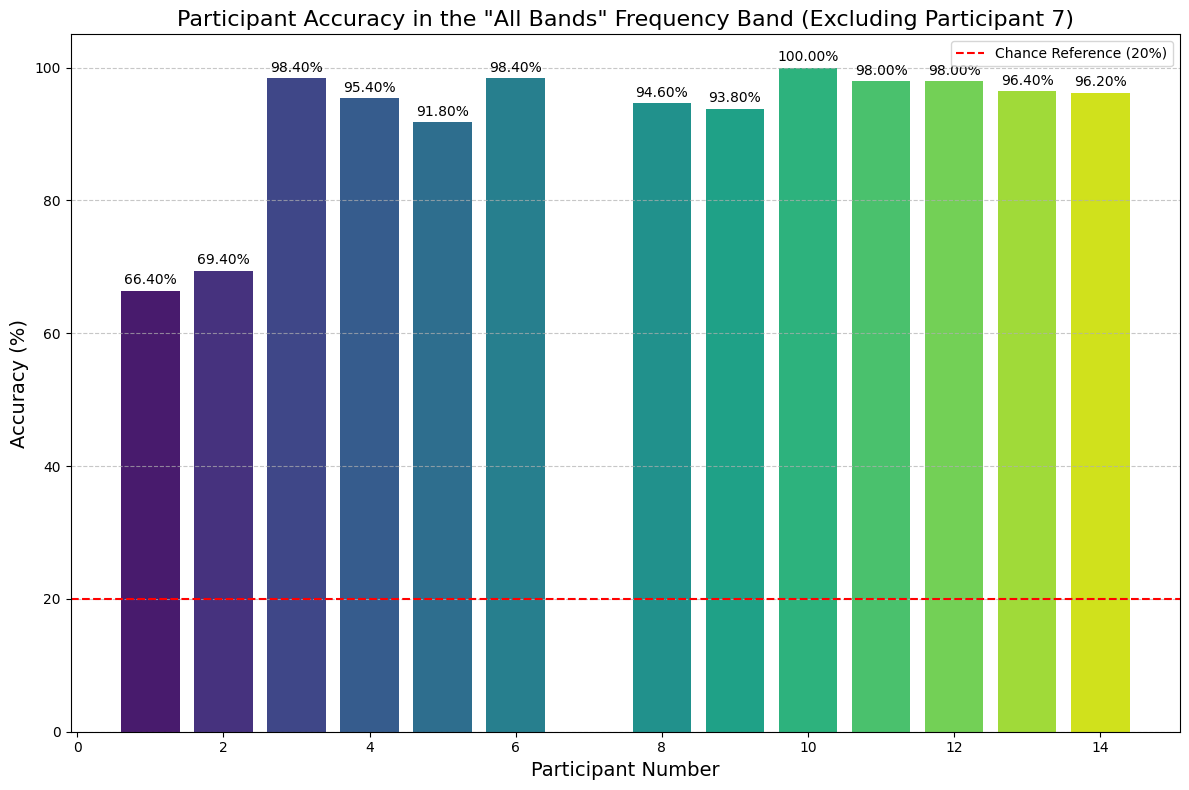

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reference_value = 0.20


df_grouped = df.groupby(['Participante', 'Banda de Frecuencia'])['Accuracy'].mean().reset_index()

filtered_df = df_grouped[df_grouped['Banda de Frecuencia'] == 'All Bands']

filtered_df = filtered_df[filtered_df['Participante'] != 7]

filtered_df['Accuracy (%)'] = filtered_df['Accuracy'] * 100

mean_accuracy = filtered_df['Accuracy (%)'].mean()
print(f"Mean Accuracy (%) Excluding Participant 7: {mean_accuracy:.2f}")

filtered_df = filtered_df.sort_values(by='Participante')

plt.figure(figsize=(12, 8))

colors = sns.color_palette("viridis", len(filtered_df))

bars = plt.bar(filtered_df['Participante'], filtered_df['Accuracy (%)'], color=colors)

plt.axhline(reference_value * 100, color='red', linestyle='--', label='Chance Reference (20%)')


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height + 0.5, 
        f'{height:.2f}%',  
        ha='center',  
        va='bottom',  
        fontsize=10,  
        color='black'  
    )

plt.title('Participant Accuracy in the "All Bands" Frequency Band (Excluding Participant 7)', fontsize=16)
plt.xlabel('Participant Number', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.savefig('Accuracy_Per_Participant_All_Bands_Vertical_Enhanced_Excluding_Participant_7.png', format='png', bbox_inches='tight')
plt.show()


Sigma Test Results:
Alpha:
  Mean Accuracy = 0.8758
  Standard Deviation = 0.0730
  Z-Score = 33.38
  p-Value = 0.0000

Beta:
  Mean Accuracy = 0.8806
  Standard Deviation = 0.0843
  Z-Score = 29.11
  p-Value = 0.0000

Gamma:
  Mean Accuracy = 0.8080
  Standard Deviation = 0.1094
  Z-Score = 20.04
  p-Value = 0.0000

High Gamma:
  Mean Accuracy = 0.6334
  Standard Deviation = 0.1545
  Z-Score = 10.12
  p-Value = 0.0000



C:\Users\34679\AppData\Local\Temp\ipykernel_21288\3903271303.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')


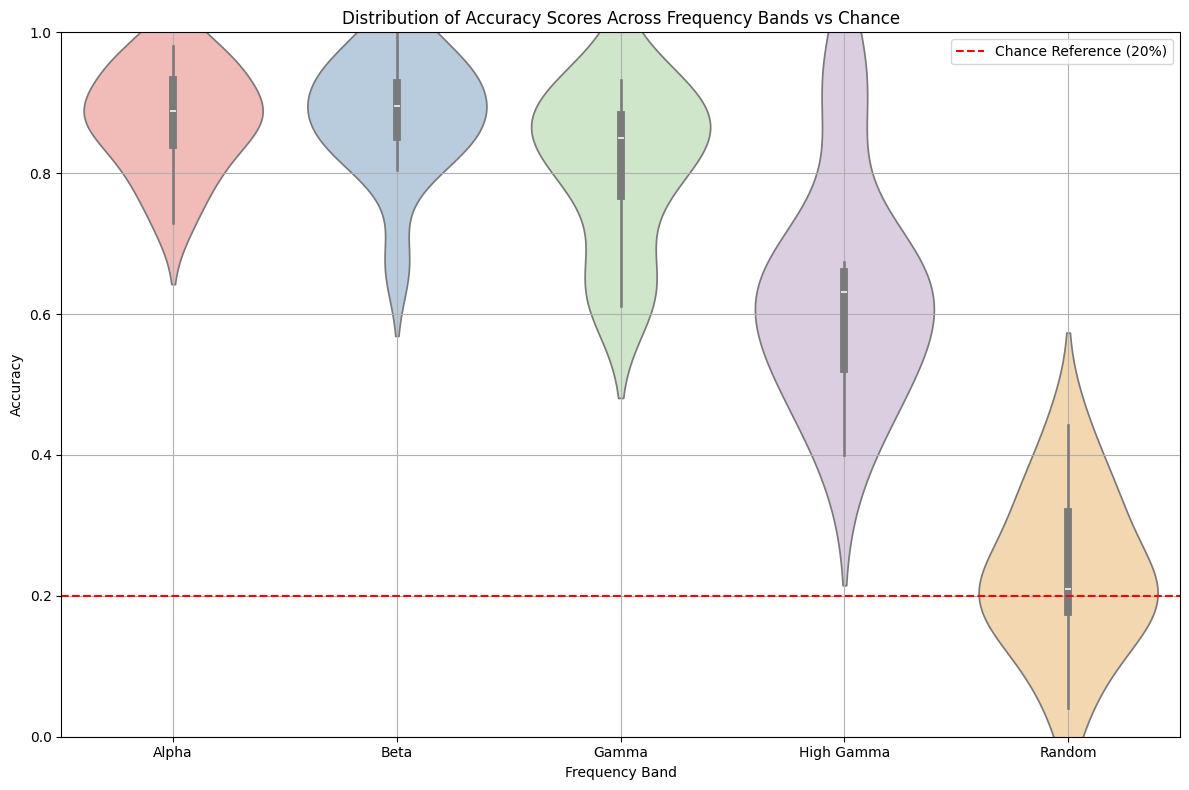

In [26]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

reference_value = 0.20

data = {
    'Participante': np.tile(range(1, 10), 4),
    'Banda de Frecuencia': ['Alpha']*9 + ['Beta']*9 + ['Gamma']*9 + ['High Gamma']*9,
    'Accuracy': np.random.uniform(0.5, 0.9, 36)
}
df = df = pd.read_excel(file_path, sheet_name='Sheet1')
df_grouped = df.groupby(['Participante', 'Banda de Frecuencia'])['Accuracy'].mean().reset_index()

filtered_df = df_grouped[df_grouped['Banda de Frecuencia'] != 'All Bands']

random_data = pd.DataFrame({
    'Participante': filtered_df['Participante'].unique(),  # Mantener la misma cantidad de participantes
    'Banda de Frecuencia': ['Random'] * len(filtered_df['Participante'].unique()),
    'Accuracy': np.clip(np.random.normal(loc=reference_value, scale=0.1, size=len(filtered_df['Participante'].unique())), 0, 1)
})

combined_df = pd.concat([filtered_df, random_data])

results = []

for band in filtered_df['Banda de Frecuencia'].unique():
    band_data = filtered_df[filtered_df['Banda de Frecuencia'] == band]['Accuracy']
    mean_accuracy = band_data.mean()
    std_accuracy = band_data.std()
    z_score = (mean_accuracy - reference_value) / (std_accuracy / np.sqrt(len(band_data)))
    p_value = stats.norm.sf(np.abs(z_score)) * 2  # Valor p para el Z-Score
    results.append((band, mean_accuracy, std_accuracy, z_score, p_value))

print("Sigma Test Results:")
for band, mean_accuracy, std_accuracy, z_score, p_value in results:
    print(f"{band}:")
    print(f"  Mean Accuracy = {mean_accuracy:.4f}")
    print(f"  Standard Deviation = {std_accuracy:.4f}")
    print(f"  Z-Score = {z_score:.2f}")
    print(f"  p-Value = {p_value:.4f}\n")

plt.figure(figsize=(12, 8))
sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')

plt.axhline(reference_value, color='red', linestyle='--', label=f'Chance Reference (20%)')

plt.ylim(0, 1)  


plt.title('Distribution of Accuracy Scores Across Frequency Bands vs Chance')
plt.xlabel('Frequency Band')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('Model_vs_Chance_Comparison_Frequency_Bands_Accuracy.png', format='png', bbox_inches='tight')
plt.show()
